<a href="https://colab.research.google.com/github/YasminaNasser/Stroke-Prediction-Data-Mining/blob/google-collab/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [20]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 | Data overview


In [21]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- id: Identification number of the individual.
- gender: Gender of the individual.
- hypertension: Health related parameter, does person have hypertension.
- heart_disease: Health related parameter, does person have heart disease.
- ever_married: Personal information, is person married on not?
- work_type: Nature of work place.
- Residence_type: Residence type of the individual.
- avg_glucose_level: average glucose level in blood for the individual.
- bmi: body mass index of the individual.
- smoking_status: Habitual information. Current smoking status of individual.
- stroke: Our taget, is person suffered heart attack?

In [22]:
# Display the shape of the DataFrame after removing duplicates
df.shape

(5110, 12)

In [23]:
# Drop column = 'id' , wont needed it in predicting stroke
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 10 features and 1 output variable


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### 1.1 Describe Data

In [9]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [10]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


**Initial Insights:**

Data from bmi feature is missing.

Both Categorical and numerical features are present.

- Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
- Binary Numerical Features: hypertension,heart_disease, stroke
- Continous Numerical Features: age, avg_glucose_level, bmi

Most of the data is categorical which need a special attention to visualize those.

Feature extraction can be done by binning the continous features ( age, sugar level, and bmi) and let's keep every things as it is.

### 1.2  Categorical Features

In [ ]:
# Extract categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("------------------Extracting Categorical Features------------------")
print("Categorical Features:", categorical_features)


------------------Extracting Categorical Features------------------
Categorical Features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
# Process each categorical feature
for feature in categorical_features:
    print(f"\nProcessing Feature: {feature}")

    # Get value counts for the feature
    value_counts = df[feature].value_counts(dropna=False)
    print(f"Value Counts:\n{value_counts}")



Processing Feature: gender
Value Counts:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Processing Feature: ever_married
Value Counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Processing Feature: work_type
Value Counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Processing Feature: Residence_type
Value Counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Processing Feature: smoking_status
Value Counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


# Step 2 | Preprocessing Techniques


## 2.1 Check Nulls

In [ ]:
# check null
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


the missing values of bmi are nulls.

In [ ]:
print((df.isna().sum()/len(df))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


There is 201 samples with no values in bmi column , its about 4% of data.

## 2.2 Check Duplicates

In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

print("\n------------------Checking for Duplicate Rows------------------")
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    print("Duplicate Rows:\n", duplicate_rows)
else:
    print("No exact duplicate rows found.")



------------------Checking for Duplicate Rows------------------
No exact duplicate rows found.


## 2.3 Check Coorelation between features

In [ ]:
# Create a copy of the DataFrame to work with numeric data
df_numeric = df.copy()

# Encode categorical variables
for col in df_numeric.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding categorical column: {col}")
    df_numeric[col] = LabelEncoder().fit_transform(df_numeric[col])

# Display the first few rows of the numeric DataFrame
df_numeric.head()

Encoding categorical column: gender
Encoding categorical column: ever_married
Encoding categorical column: work_type
Encoding categorical column: Residence_type
Encoding categorical column: smoking_status


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Print all the features in the correlation matrix
print("\nFeatures in the Correlation Matrix:")
print(corr_matrix.columns.tolist())


Features in the Correlation Matrix:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
# Display the correlation matrix as a DataFrame
corr_matrix

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026678,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.304876,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,0.063437,0.131945
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.224473,1.000000,0.028123


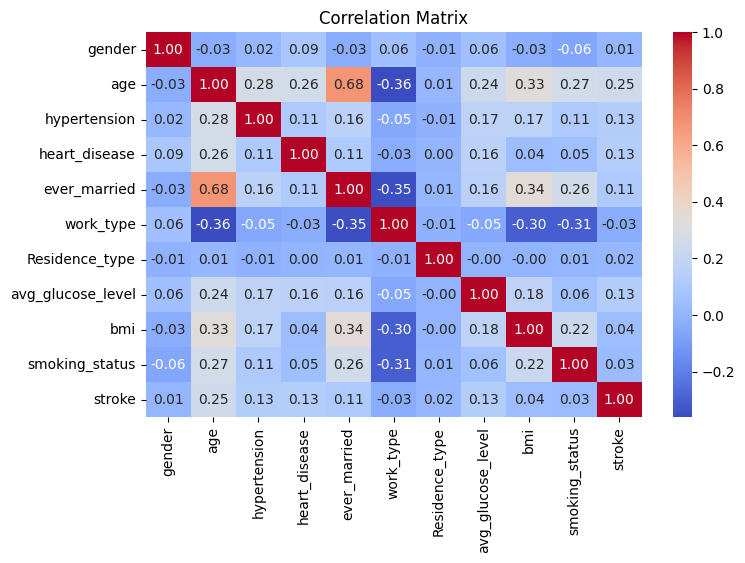

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

ever_married and age have strong relation.



In [ ]:
# Initialize parameters
threshold = 0.003550
reason = "The column is detected as not contributing significantly to other features."
columns_to_drop = []

# Iterate over each column to check its correlation with others
for column in corr_matrix.columns:
    # Get correlations of the current column with all others (excluding itself)
    column_correlation = corr_matrix[column].drop(column)

    # Check if all correlations are below the threshold
    if all(abs(column_correlation) < threshold) and column not in columns_to_drop:
        columns_to_drop.append(column)
        print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
        print(f"Reason: {reason}")

# Display the list of columns to drop
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: []


## 2.4 Imputations of nulls

In [ ]:
# Identify numerical features (excluding the last column)
numerical_features = df.iloc[:, :-1].select_dtypes(include=[np.number]).columns.tolist()

print("------------------ Extracting Numerical Features ------------------")
print(numerical_features)

# Create a DataFrame with only numerical features (excluding the target column)
dataframe_N = df[numerical_features]

print("------------------ Numerical DataFrame ------------------------")
dataframe_N.head()

------------------ Extracting Numerical Features ------------------
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
------------------ Numerical DataFrame ------------------------


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


### 2.4.1 BMI Nulls heatmap

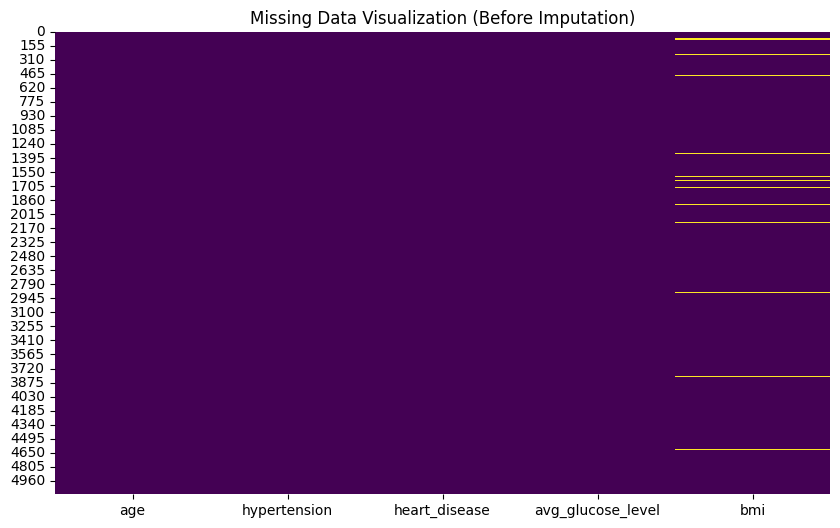

In [ ]:
# Visualization of missing data before imputation
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe_N.isnull(), cbar=False, cmap='viridis', cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data Visualization (Before Imputation)')
plt.show()

### 2.4.2 Impute with mean

In [ ]:
# Replace NaN values with the mean of each column
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataframe_N_imputed = imp_mean.fit_transform(dataframe_N)

# Convert the NumPy array back to a DataFrame with the original column names
dataframe_N_imputed = pd.DataFrame(dataframe_N_imputed, columns=numerical_features)

print("------------------ Data After Imputation ------------------------")
dataframe_N_imputed.head()


------------------ Data After Imputation ------------------------


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0.0,1.0,228.69,36.600000
1,61.0,0.0,0.0,202.21,28.893237
2,80.0,0.0,1.0,105.92,32.500000
3,49.0,0.0,0.0,171.23,34.400000
4,79.0,1.0,0.0,174.12,24.000000


### 2.4.3 Normalize after imputation

In [ ]:
# Normalize the data to a range of [0, 1]
normalizer = MinMaxScaler(feature_range=(0, 1))
dataframe_N_normalized = normalizer.fit_transform(dataframe_N_imputed)

# Convert the normalized array back to a DataFrame with the original column names
dataframe_N_normalized = pd.DataFrame(dataframe_N_normalized, columns=numerical_features)

print("------------------ Data After Normalization ------------------------")
dataframe_N_normalized.head()

------------------ Data After Normalization ------------------------


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.816895,0.0,1.0,0.801265,0.301260
1,0.743652,0.0,0.0,0.679023,0.212981
2,0.975586,0.0,1.0,0.234512,0.254296
3,0.597168,0.0,0.0,0.536008,0.276060
4,0.963379,1.0,0.0,0.549349,0.156930


In [ ]:
# Update the original dataset with the normalized numerical features
df[numerical_features] = dataframe_N_normalized

print("------------------- Data After Handling Missing Values and Normalization ---------------")
df.head()

------------------- Data After Handling Missing Values and Normalization ---------------


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1
2,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


# Step 3 | Outliers Detection

In this analysis, both capping and removing outliers will be implemented to address extreme values in the dataset. The goal is to evaluate and compare the impact of these two methods on the data distribution, overall trends, and the insights derived. By capping outliers, extreme values are adjusted to lie within statistically acceptable bounds, preserving all data points while mitigating their influence on analysis. Conversely, removing outliers entirely excludes rows with extreme values, simplifying the dataset but potentially discarding valuable information. By applying both techniques to the same dataset and visualizing the results, we can better understand their respective advantages, limitations, and the contexts in which each method is more appropriate.

In [28]:
# Load the dataset
df_copy = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df_copy.drop('id', axis=1, inplace=True)

# Define numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Display the initial data
df_copy.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Distribution before removal of outliers


<ipython-input-15-f9200df40ef5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


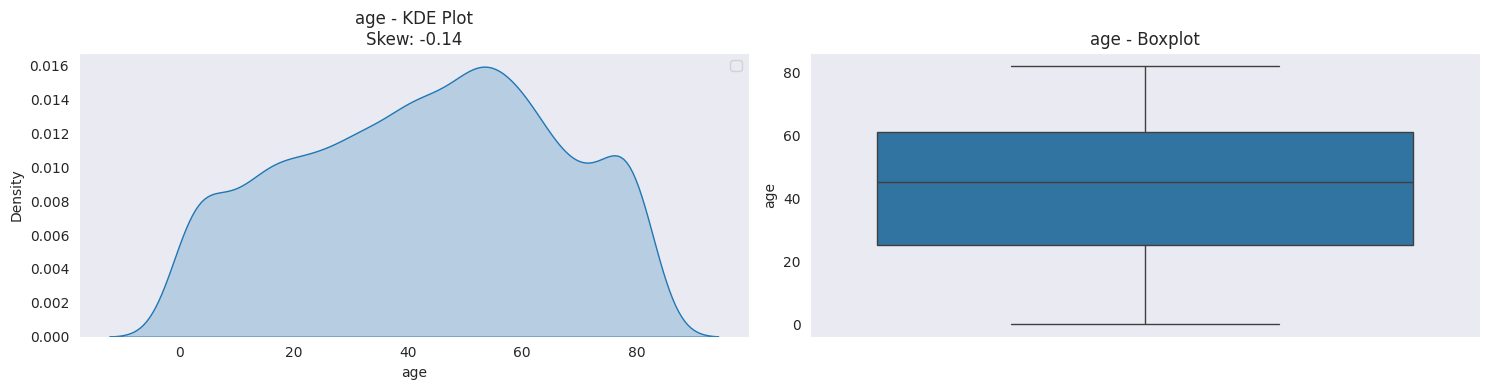

<ipython-input-15-f9200df40ef5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


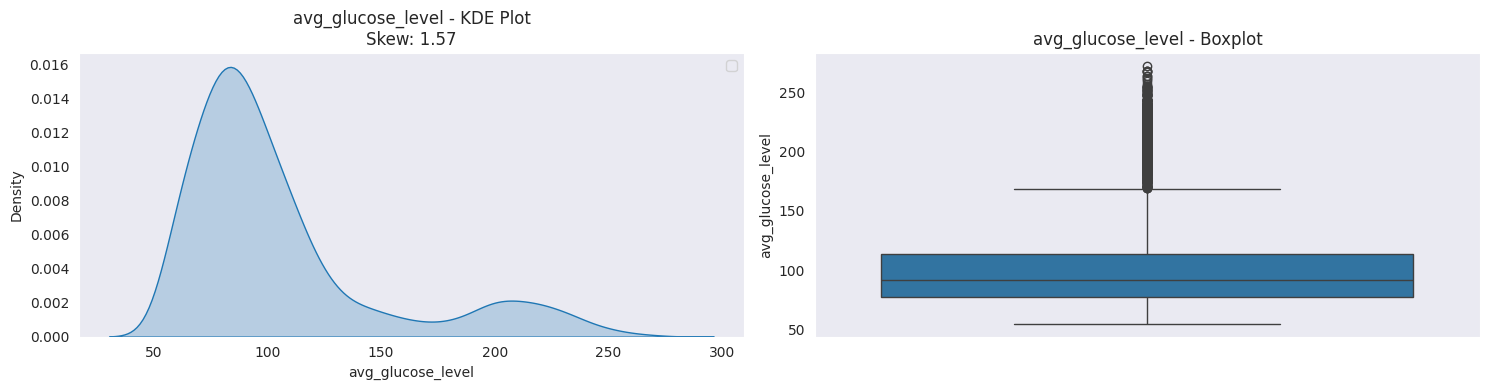

<ipython-input-15-f9200df40ef5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


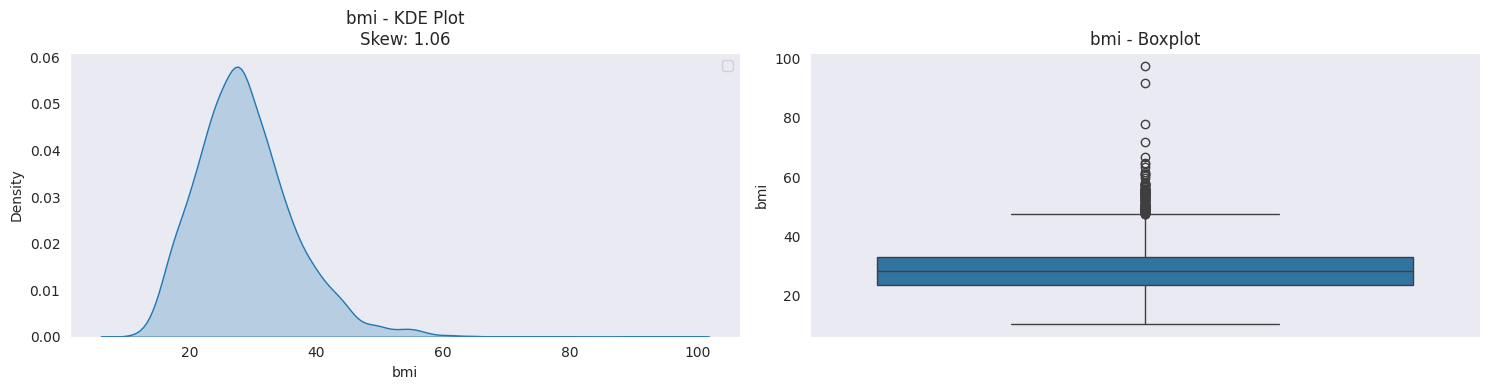

In [15]:
sns.set_style('dark')
for col in numerical_features:
    plt.figure(figsize=(15,4))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[col], shade=True)
    plt.title(f"{col} - KDE Plot\nSkew: {np.round(df[col].skew(), 2)}")
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

#3.1 Removing outliers from dataset


In [29]:
# Remove outliers from numerical features
for column in numerical_features:
    Q1 = df_copy[column].quantile(0.25)  # First quartile
    Q3 = df_copy[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                        # Interquartile range
    lower_bound = Q1 - 1.5 * IQR         # Lower threshold
    upper_bound = Q3 + 1.5 * IQR         # Upper threshold

    # Filter out the outliers
    df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

# Display the cleaned data
df_copy.reset_index(drop=True, inplace=True)
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


Show Distribution before and after removal of outliers

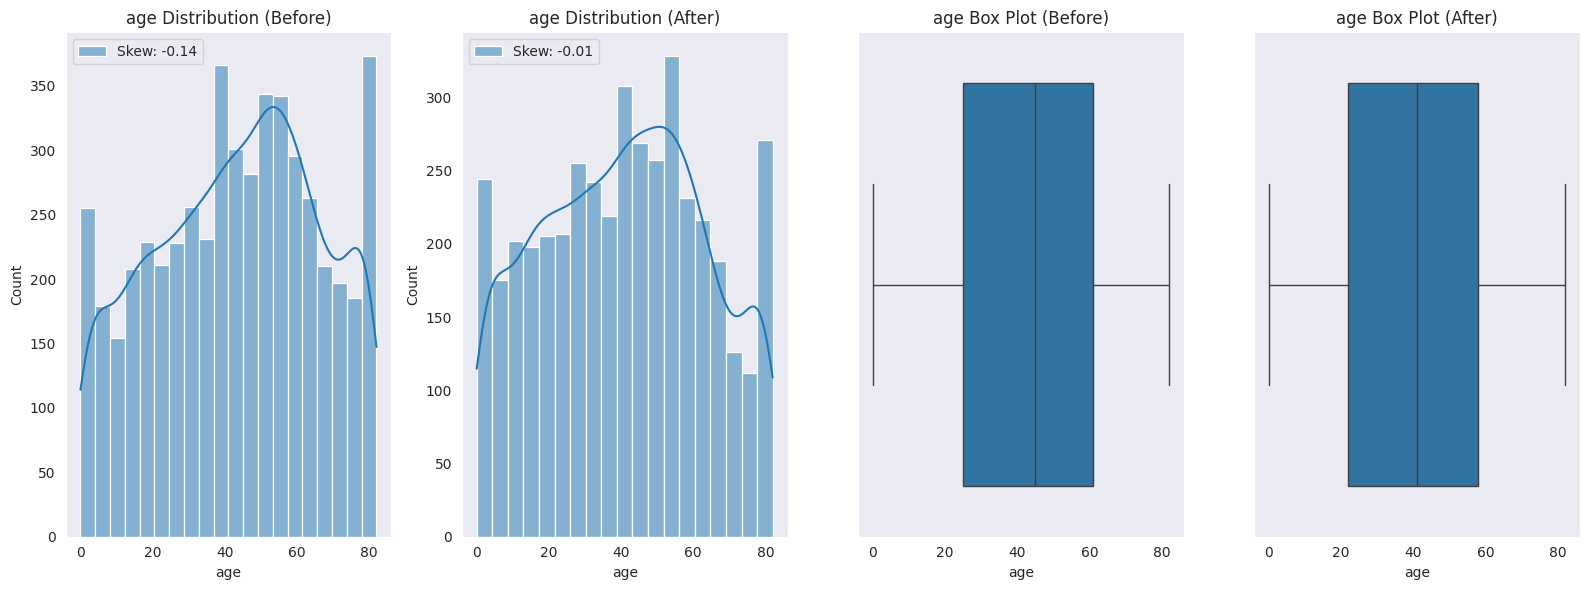

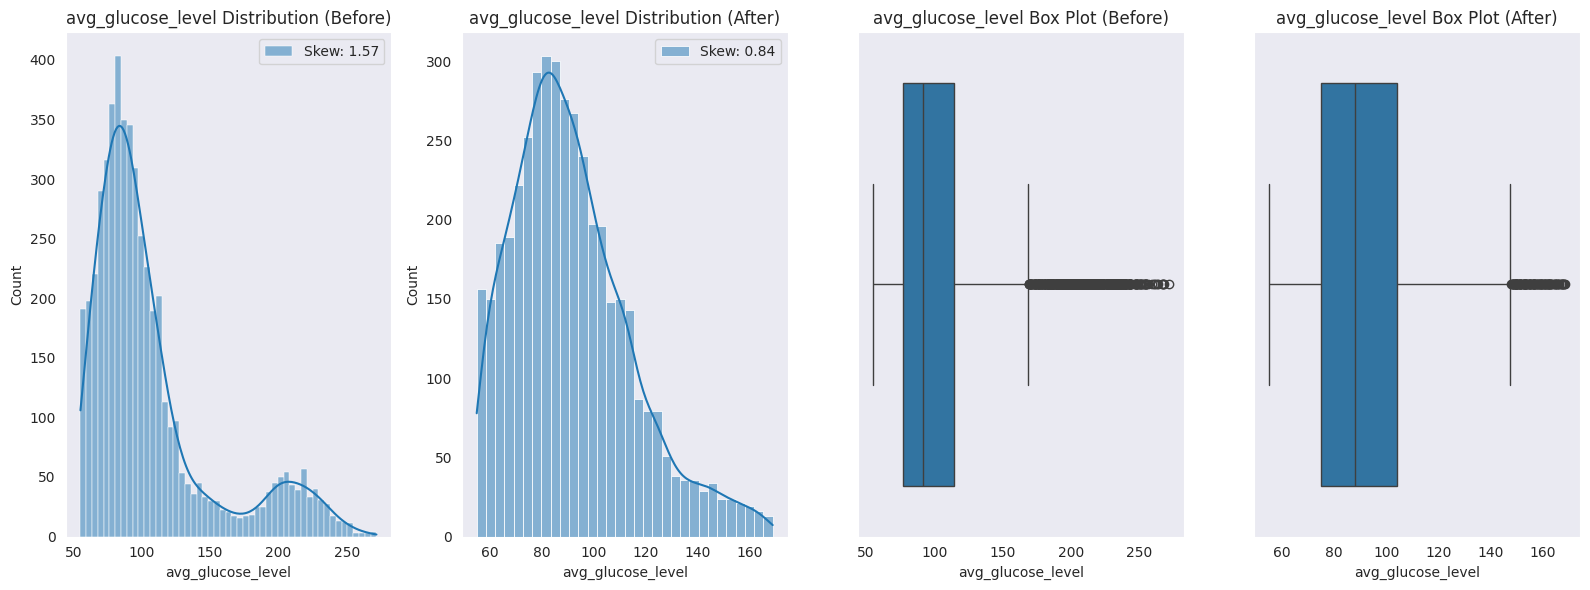

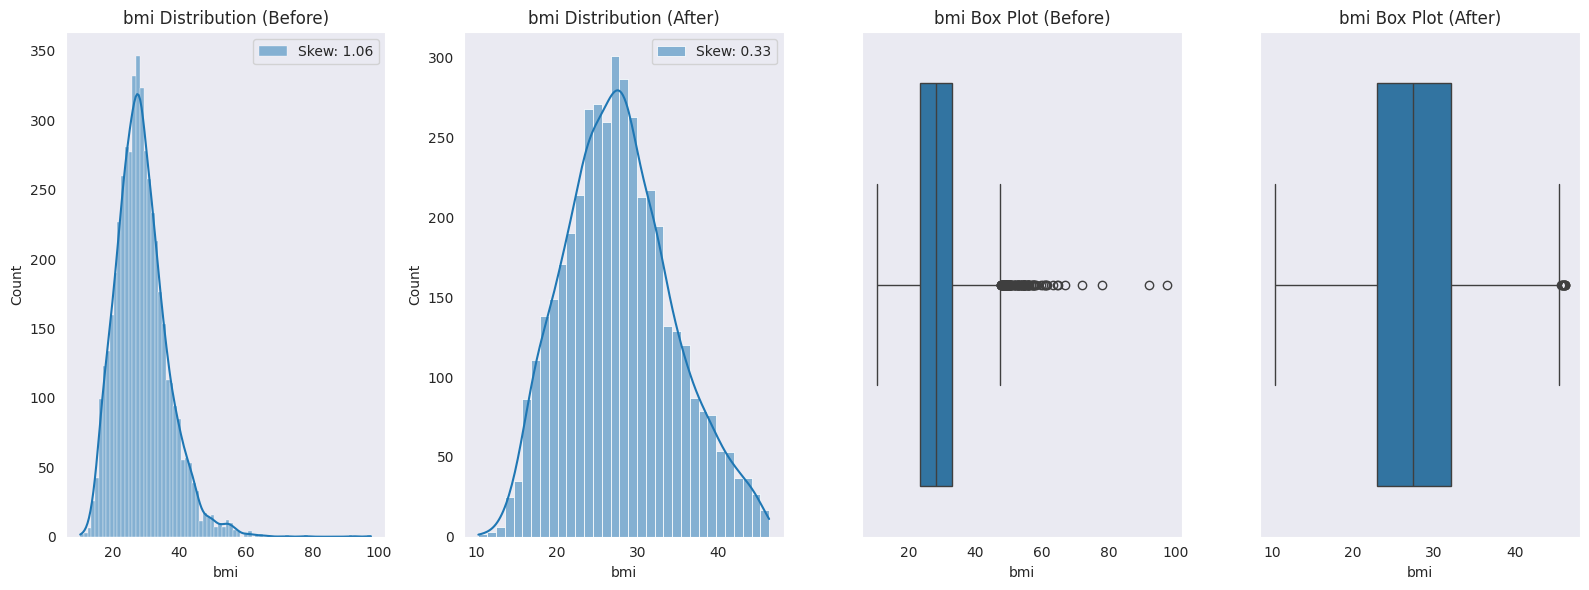

In [32]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")


df_cleaned = df_copy.copy()
# Plot distributions and box plots for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(16, 6))

    # Distribution plot before outlier removal
    plt.subplot(141)
    sns.histplot(df[col], kde=True, label="Skew: " + str(np.round(df[col].skew(), 2)))
    plt.title(f'{col} Distribution (Before)')
    plt.legend()

    # Distribution plot after outlier removal
    plt.subplot(142)
    sns.histplot(df_cleaned[col], kde=True, label="Skew: " + str(np.round(df_cleaned[col].skew(), 2)))
    plt.title(f'{col} Distribution (After)')
    plt.legend()

    # Box plot before outlier removal
    plt.subplot(143)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Box Plot (Before)')

    # Box plot after outlier removal
    plt.subplot(144)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'{col} Box Plot (After)')

    plt.tight_layout()
    plt.show()

The removal of outliers involves excluding data points that fall outside a defined range, typically based on statistical measures like the Interquartile Range (IQR) or standard deviation. By removing outliers, the dataset becomes more homogeneous, reducing the potential for extreme values to distort statistical analyses, such as mean, variance, or regression models. This method can be particularly effective when outliers are due to data entry errors, measurement inaccuracies, or conditions that are not relevant to the analysis. However, while removing outliers can improve model accuracy and reduce noise, it may also lead to a loss of valuable information, especially if the outliers represent natural variations or rare but significant observations. Moreover, the reduction in sample size may weaken the robustness of the analysis and affect the generalizability of the results. Therefore, careful consideration is required to ensure that the removal of outliers does not result in the loss of critical data or insights

#3.2 Capping the outliers


In [33]:
# Reload the original dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Copy the original DataFrame for modification
df_capped = df.copy()

# Loop through numerical features and cap outliers
for col in numerical_features:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])


Visualize distribution before and after capping

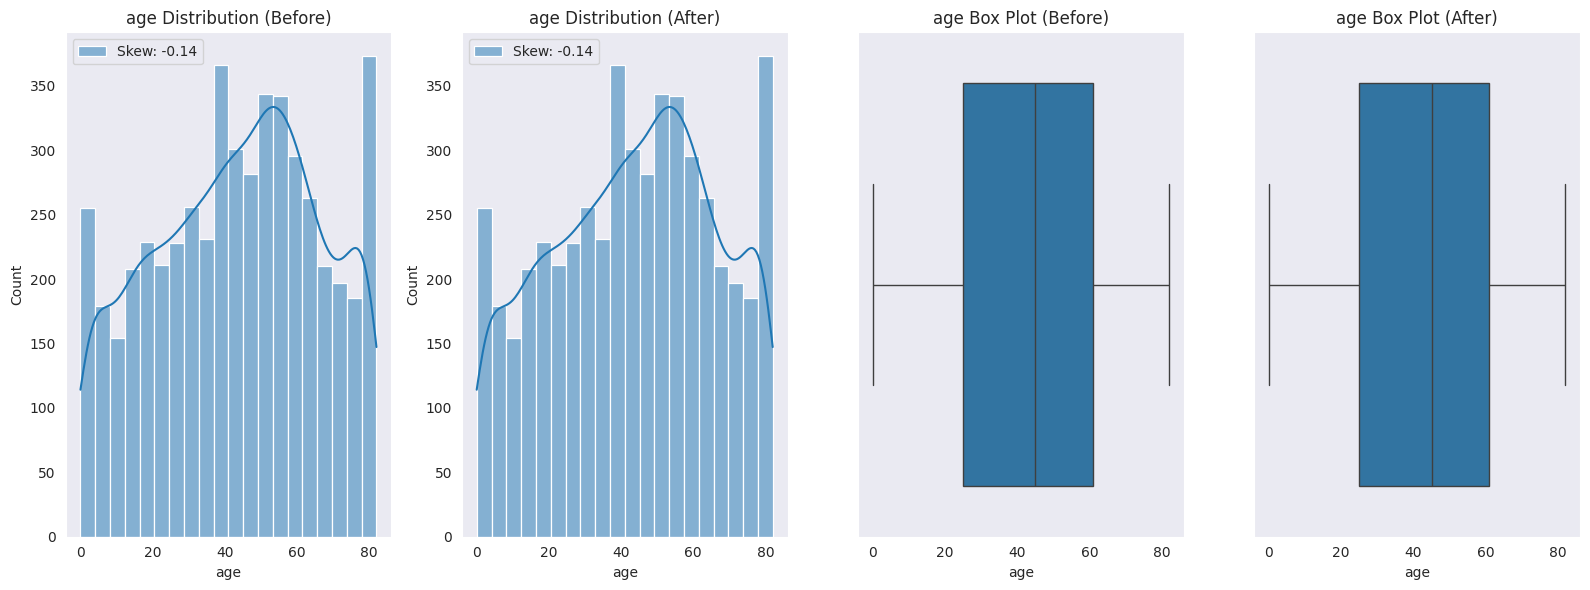

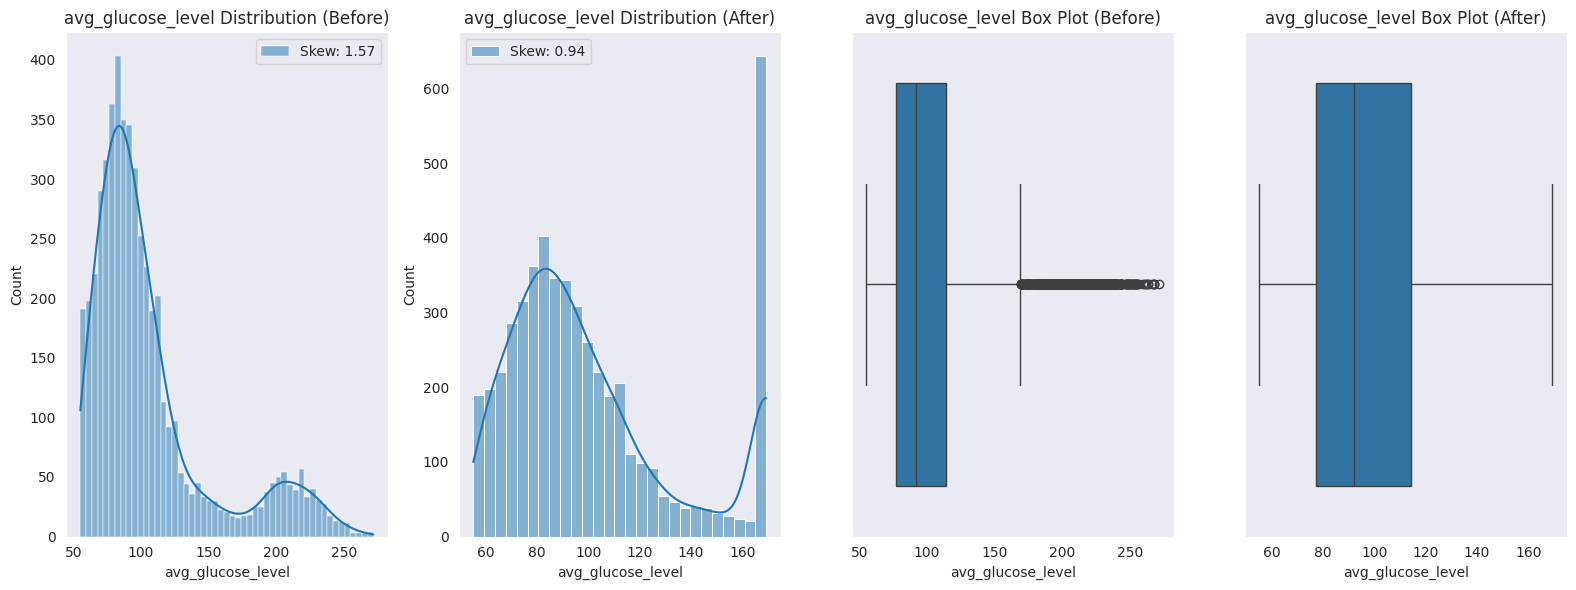

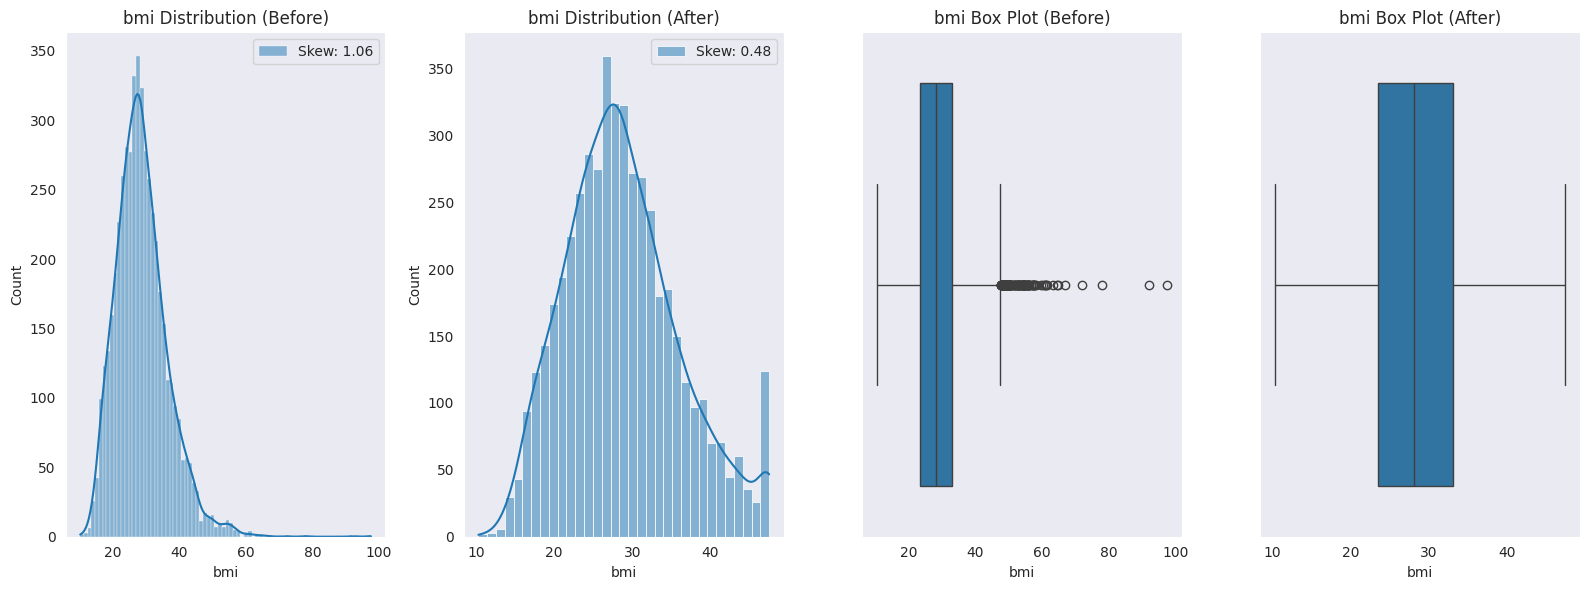

In [34]:
for col in numerical_features:
    plt.figure(figsize=(16, 6))

    # Distribution plot before capping
    plt.subplot(141)
    sns.histplot(df[col], kde=True, label="Skew: " + str(np.round(df[col].skew(), 2)))
    plt.title(f'{col} Distribution (Before)')
    plt.legend()

    # Distribution plot after capping
    plt.subplot(142)
    sns.histplot(df_capped[col], kde=True, label="Skew: " + str(np.round(df_capped[col].skew(), 2)))
    plt.title(f'{col} Distribution (After)')
    plt.legend()

    # Box plot before capping
    plt.subplot(143)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Box Plot (Before)')

    # Box plot after capping
    plt.subplot(144)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col} Box Plot (After)')

    plt.tight_layout()
    plt.show()

Capping outliers involves adjusting extreme values to fall within a specified range, rather than removing them from the dataset. This method helps reduce the impact of outliers without losing any data points. By setting a cap, values that are too high or too low are replaced with the maximum or minimum acceptable value, based on statistical measures like the Interquartile Range (IQR). Capping helps make the dataset more balanced and prevents outliers from distorting statistical results, such as averages or correlations. While it preserves all data, it can introduce some bias if the capped values no longer reflect the true extremes of the data. Overall, capping is useful when you want to maintain the dataset size but still minimize the influence of extreme values

# Step 4 | Unbalance

In [ ]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


# Step 5 | Data Analysis


------------------Detecting Outliers------------------
No outliers detected in column 'age'.


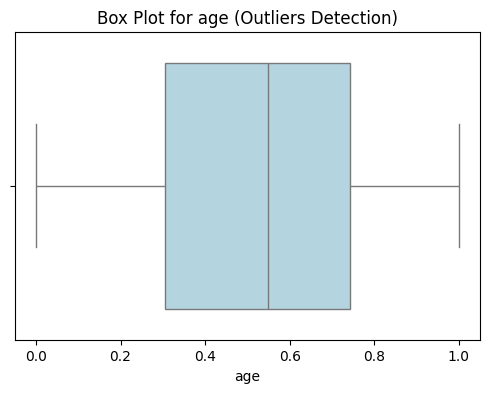

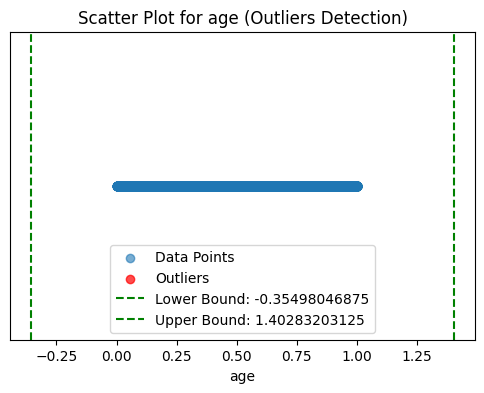

Skipping outlier detection for column 'hypertension' (only 2 unique values).
Skipping outlier detection for column 'heart_disease' (only 2 unique values).
Outliers in column 'avg_glucose_level':
      gender       age  hypertension  heart_disease ever_married  \
0       Male  0.816895           0.0            1.0          Yes   
1     Female  0.743652           0.0            0.0          Yes   
3     Female  0.597168           0.0            0.0          Yes   
4     Female  0.963379           1.0            0.0          Yes   
5       Male  0.987793           0.0            0.0          Yes   
...      ...       ...           ...            ...          ...   
5061    Male  0.499512           0.0            0.0          Yes   
5062  Female  1.000000           0.0            0.0          Yes   
5063    Male  0.475098           0.0            0.0          Yes   
5064    Male  0.853516           0.0            0.0          Yes   
5076  Female  0.414062           0.0            0.0      

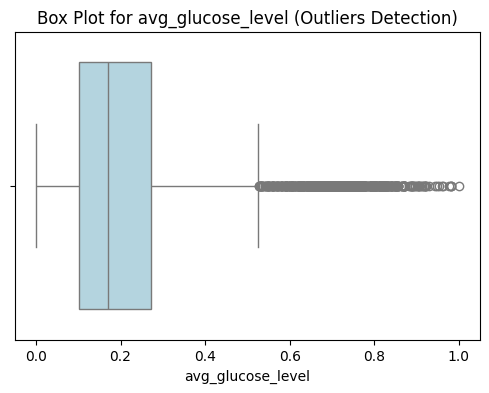

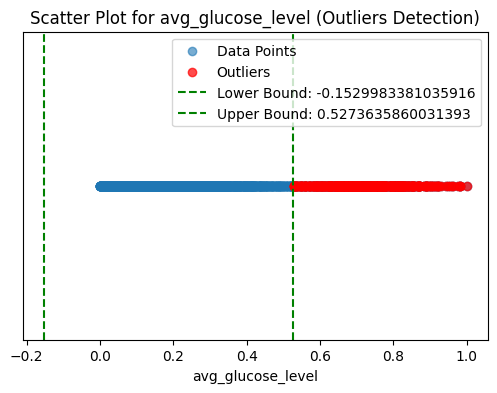

Outliers in column 'bmi':
      gender       age  hypertension  heart_disease ever_married  \
21    Female  0.633789           1.0            0.0          Yes   
66    Female  0.853516           0.0            0.0          Yes   
113   Female  0.548340           0.0            0.0          Yes   
254   Female  0.572754           0.0            0.0          Yes   
258   Female  0.902344           1.0            0.0          Yes   
...      ...       ...           ...            ...          ...   
4906  Female  0.645996           0.0            0.0          Yes   
4952    Male  0.621582           1.0            0.0          Yes   
5009  Female  0.609375           0.0            0.0          Yes   
5057  Female  0.597168           0.0            0.0          Yes   
5103  Female  0.218750           0.0            0.0           No   

          work_type Residence_type  avg_glucose_level       bmi  \
21    Self-employed          Urban           0.822500  0.442153   
66          Private    

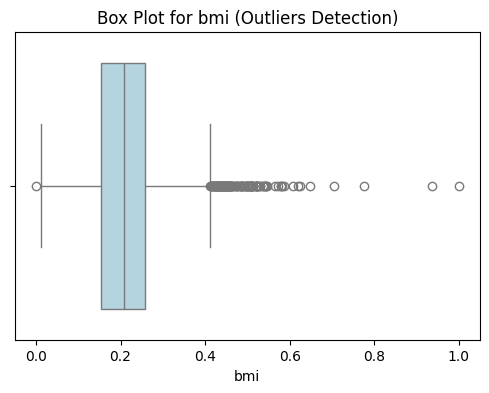

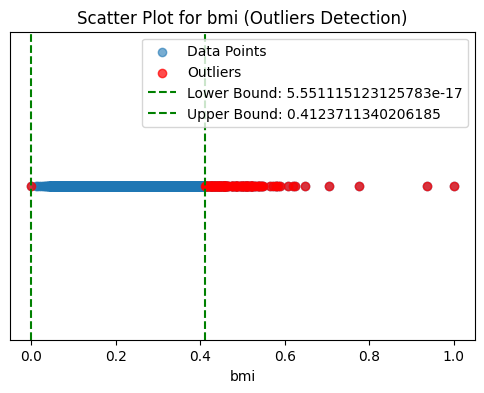


------------------Summary of Detected Outliers------------------
Outliers in column 'avg_glucose_level' at indices: [0, 1, 3, 4, 5, 13, 14, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 33, 36, 44, 45, 54, 55, 57, 58, 59, 60, 66, 71, 73, 76, 90, 95, 97, 101, 102, 107, 113, 115, 122, 123, 124, 128, 130, 132, 134, 135, 137, 138, 139, 144, 149, 150, 151, 155, 157, 158, 163, 175, 179, 187, 189, 190, 193, 195, 196, 201, 212, 215, 217, 218, 219, 220, 222, 225, 226, 233, 234, 235, 241, 242, 243, 254, 256, 258, 272, 277, 278, 293, 298, 303, 307, 314, 318, 325, 326, 330, 331, 332, 337, 343, 350, 355, 360, 365, 386, 396, 399, 411, 417, 426, 429, 433, 436, 444, 456, 466, 467, 468, 477, 479, 492, 515, 544, 549, 551, 552, 559, 563, 570, 576, 581, 583, 585, 595, 598, 599, 610, 616, 620, 642, 706, 708, 719, 744, 746, 755, 762, 770, 785, 816, 846, 848, 851, 865, 867, 880, 887, 894, 923, 929, 930, 946, 948, 970, 971, 1011, 1059, 1061, 1067, 1070, 1071, 1092, 1097, 1102, 1104, 1113, 1118, 1131, 1158,

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Detect outliers
outlier_indices = detect_outliers(df, numerical_columns)

# Save outliers to a CSV file
outliers_df = df.loc[list(set(sum(outlier_indices.values(), [])))]
outliers_df.to_csv("outliers.csv", index=False)
print("\nOutliers exported to 'outliers.csv'.")

In [ ]:
outlier_rows = list(set(sum(outlier_indices.values(), [])))  # Flatten indices
df_without_outliers = df.drop(index=outlier_rows)
# Cap outliers in the original dataframe
df_capped_outliers = cap_outliers(df, numerical_columns)
# Save results to CSV files
# df_without_outliers.to_csv("data_without_outliers.csv", index=False)
# print("\nDataset without outliers saved to 'data_without_outliers.csv'.")

# df_capped_outliers.to_csv("data_capped_outliers.csv", index=False)
# print("\nDataset with capped outliers saved to 'data_capped_outliers.csv'.")


Dataset without outliers saved to 'data_without_outliers.csv'.

Dataset with capped outliers saved to 'data_capped_outliers.csv'.


In [ ]:
import matplotlib.pyplot as plt

# Example for the 'age' column (you can choose any numerical column)
plt.hist(df_before['age'], bins=20, color='red', alpha=0.7, label='Original')
plt.hist(df_without_outliers['age'], bins=20, color='green', alpha=0.5, label='Without Outliers')
# plt.hist(df_capped_outliers['age'], bins=20, color='orange', alpha=0.5, label='Capped Outliers')
plt.legend(loc='upper right')
plt.title('Age Distribution Before and After Handling Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Example for the 'hypertension' column (you can choose any numerical column)
plt.hist(df_before['hypertension'], bins=20, color='red', alpha=0.7, label='Original')
plt.hist(df_without_outliers['hypertension'], bins=20, color='green', alpha=0.5, label='Without Outliers')
# plt.hist(df_capped_outliers['age'], bins=20, color='orange', alpha=0.5, label='Capped Outliers')
plt.legend(loc='upper right')
plt.title('hypertension Distribution Before and After Handling Outliers')
plt.xlabel('hypertension')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Example for the 'bmi' column (you can choose any numerical column)
plt.hist(df_before['bmi'], bins=20, color='red', alpha=0.7, label='Original')
plt.hist(df_without_outliers['bmi'], bins=20, color='green', alpha=0.5, label='Without Outliers')
# plt.hist(df_capped_outliers['age'], bins=20, color='orange', alpha=0.5, label='Capped Outliers')
plt.legend(loc='upper right')
plt.title('bmi Distribution Before and After Handling Outliers')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Example for the 'bmi' column (you can choose any numerical column)
plt.hist(df_before['avg_glucose_level'], bins=20, color='red', alpha=0.7, label='Original')
plt.hist(df_without_outliers['avg_glucose_level'], bins=20, color='green', alpha=0.5, label='Without Outliers')
# plt.hist(df_capped_outliers['age'], bins=20, color='orange', alpha=0.5, label='Capped Outliers')
plt.legend(loc='upper right')
plt.title('avg_glucose_level Distribution Before and After Handling Outliers')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

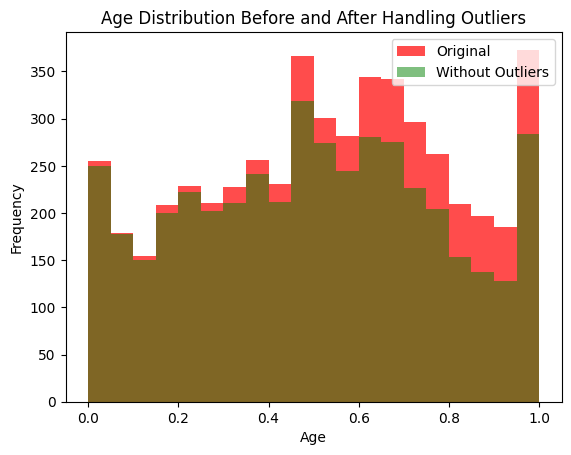

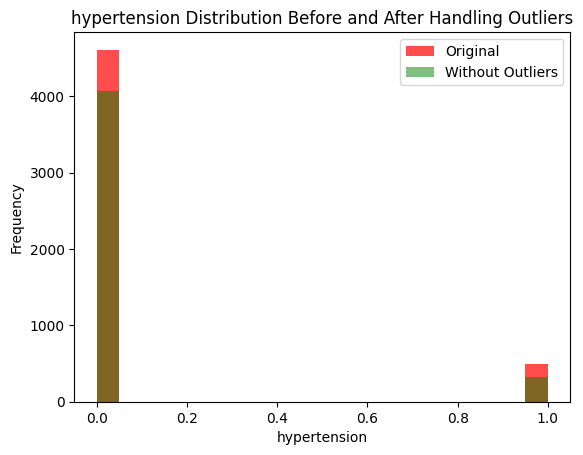

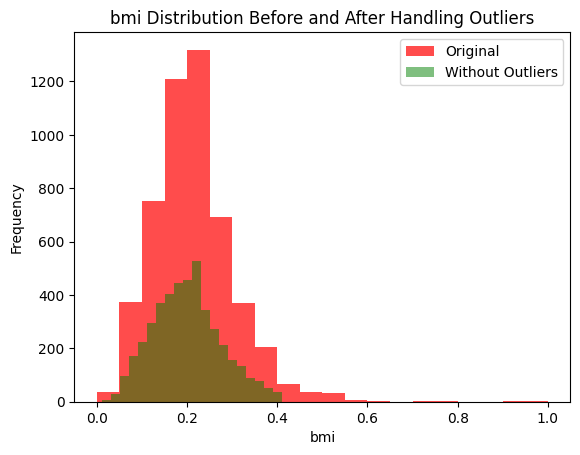

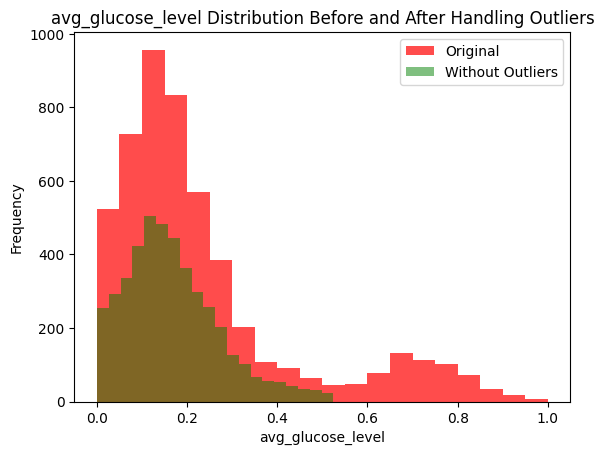

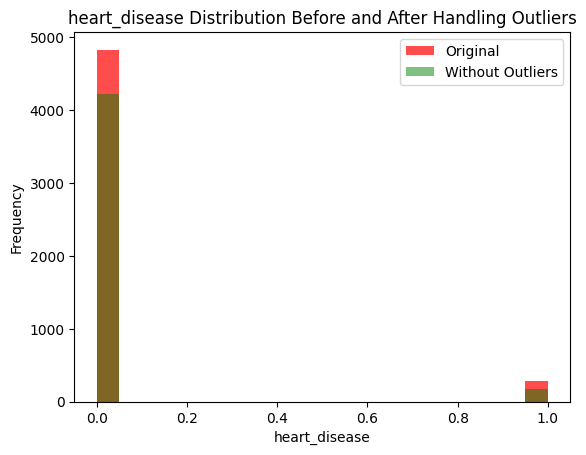

In [ ]:
# Example for the 'bmi' column (you can choose any numerical column)
plt.hist(df_before['heart_disease'], bins=20, color='red', alpha=0.7, label='Original')
plt.hist(df_without_outliers['heart_disease'], bins=20, color='green', alpha=0.5, label='Without Outliers')
# plt.hist(df_capped_outliers['age'], bins=20, color='orange', alpha=0.5, label='Capped Outliers')
plt.legend(loc='upper right')
plt.title('heart_disease Distribution Before and After Handling Outliers')
plt.xlabel('heart_disease')
plt.ylabel('Frequency')
plt.show()


# Functions


### Function: `check_duplicate_rows(df, remove_duplicates=False)`

**Objective**:  
Detect and optionally remove duplicate rows from the dataset.

**Steps**:  
1. Identify duplicate rows using the `duplicated()` method.  
2. Print the count and details of duplicate rows, if any.  
3. Optionally, remove duplicates by setting `remove_duplicates=True` and using the `drop_duplicates()` method.  

**Importance**:  
- Ensures the dataset does not contain redundant information that could skew analyses or model training.


### check_duplicate_rows_with_visualization

In [ ]:
def check_duplicate_rows_with_visualization(df, correlation_threshold=0.95, remove_duplicates=False):
    """
    Check for duplicate rows, visualize the correlation matrix, and handle non-numeric data.
    Optionally remove exact duplicate rows.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        correlation_threshold (float): Threshold to flag columns as highly correlated.
        remove_duplicates (bool): Whether to remove exact duplicate rows.

    Returns:
        pd.DataFrame: The DataFrame with duplicates handled as specified.
    """
    print("------------------Visualizing Correlation Matrix------------------")

    # Handle non-numeric data by encoding or dropping
    df_numeric = df.copy()
    for col in df_numeric.select_dtypes(include=['object', 'category']).columns:
        #print(f"Encoding categorical column: {col}")
        df_numeric[col] = LabelEncoder().fit_transform(df_numeric[col])

    # Calculate and visualize the correlation matrix
    corr_matrix = df_numeric.corr()

    # Print all the features in the correlation matrix
    print("\nFeatures in the Correlation Matrix:")
    print(corr_matrix.columns.tolist())

    # Print correlation values for 'id' column if it exists
    if 'id' in corr_matrix.columns:
        print("\nCorrelation values for 'id' column:")
        print(corr_matrix['id'])

    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

    print("\nCorrelation Matrix:")
    print(corr_matrix)

    # Analyze duplicate rows based on the correlation matrix
    duplicate_rows = df[df.duplicated()]
    print("\n------------------Checking for Duplicate Rows------------------")

    if not duplicate_rows.empty:
        print(f"Number of duplicate rows: {len(duplicate_rows)}")
        print("Duplicate Rows:\n", duplicate_rows)
    else:
        print("No exact duplicate rows found.")
        print("Note: Based on the correlation matrix, there are no duplicate rows.")

    # Remove duplicates if specified
    if remove_duplicates and not duplicate_rows.empty:
        df = df.drop_duplicates()
        print("\nDuplicate rows removed.")

    return df


Remove columns that do not contribute significantly to other columns based on the correlation matrix.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        threshold (float): The correlation threshold to flag a column as useless.
        reason (str): The reason provided when a column is detected as not contributing significantly.

    Returns:
        pd.DataFrame: The DataFrame with the useless columns removed.

In [ ]:
def remove_useless_columns_using_correlation(df, threshold=0.003550, reason="The column is detected as not contributing significantly to other features."):

    # Handle non-numeric data by encoding them
    df_numeric = df.copy()
    for col in df_numeric.select_dtypes(include=['object', 'category']).columns:
        df_numeric[col] = LabelEncoder().fit_transform(df_numeric[col])

    # Compute the correlation matrix
    correlation_matrix = df_numeric.corr()

    # Initialize a list to store columns to drop
    columns_to_drop = []

    # Ensure 'id' column is removed if it exists
    if 'id' in df.columns:
        columns_to_drop.append('id')
        print(f"Detected 'id' column, removing it. Reason: {reason}")

    # Iterate over each column and check its correlation with other columns
    for column in correlation_matrix.columns:
        # Get the correlations of the current column with all other columns (excluding itself)
        column_correlation = correlation_matrix[column].drop(column)

        # If all correlations are below the threshold, consider it as a useless column
        if all(abs(column_correlation) < threshold) and column not in columns_to_drop:
            columns_to_drop.append(column)
            print(f"Detected '{column}' column as not contributing significantly to other columns, removing it.")
            print(f"Reason: {reason}")

    # Drop the detected useless columns
    if columns_to_drop:
        df = df.drop(columns=columns_to_drop)
        print(f"Columns dropped: {', '.join(columns_to_drop)}")
    else:
        print("No columns detected as useless based on the correlation threshold.")

    return df


### Function: `handle_numerical_missing_data_and_normalize(ds)`

**Objective**:  
Impute missing values in numerical columns and normalize their values to a standard range.

**Steps**:  
1. **Identify Numerical Features**:  
   - Select all columns with numerical data, excluding the last column (assumed to be the target column).
   
2. **Handle Missing Data**:  
   - Replace missing (`NaN`) values with the column mean using `SimpleImputer` from `sklearn`.

3. **Normalize Data**:  
   - Scale numerical features to a range of [0, 1] using `MinMaxScaler`.  
   - This ensures all numerical features have comparable scales, which is crucial for many machine learning algorithms.

4. Update the original dataset with the processed numerical features.

**Importance**:  
- Replacing missing values with meaningful statistics (mean) prevents loss of data.  
- Normalization eliminates the impact of differing scales across numerical features.


In [ ]:
def handle_numerical_missing_data_and_normalize(ds):
    # Identify numerical features (excluding the last column)
    numerical_features = ds.iloc[:, :-1].select_dtypes(include=[np.number]).columns.tolist()
    print("------------------ Extracting Numerical Features ------------------")
    print(numerical_features)

    # Create a dataframe with only numerical features (excluding the target column)
    dataframe_N = ds[numerical_features]
    print("------------------ Numerical DataFrame ------------------------")
    print(dataframe_N)

    # Visualization of missing data before imputation (NaN values)
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe_N.isnull(), cbar=False, cmap='viridis', cbar_kws={'label': 'Missing Data'})
    plt.title('Missing Data Visualization (Before Imputation)')
    plt.show()

    # Handle missing data: Replace NaN values with the mean of the column
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    dataframe_N_imputed = imp_mean.fit_transform(dataframe_N)

    # Convert the NumPy array back to a DataFrame with the original column names
    dataframe_N_imputed = pd.DataFrame(dataframe_N_imputed, columns=numerical_features)

    # Normalize the data to a range of [0, 1]
    normalizer = MinMaxScaler(feature_range=(0, 1))
    dataframe_N_normalized = normalizer.fit_transform(dataframe_N_imputed)

    # Convert the normalized array back to a DataFrame with the original column names
    dataframe_N_normalized = pd.DataFrame(dataframe_N_normalized, columns=numerical_features)

    # Update the original dataset with the normalized numerical features
    ds[numerical_features] = dataframe_N_normalized

    print("------------------- Data After Handling Missing Values and Normalization ---------------")
    print(ds)

    return ds


### Function: `handle_categorical_missing_data(df)`

**Objective**:  
Replace missing and infrequent values in categorical features to maintain consistency.

**Steps**:  
1. **Extract Categorical Features**:  
   - Identify columns with categorical data (`object` type).

2. **Value Analysis**:  
   - Count the frequency of each value in the feature.  
   - Define frequent and infrequent values based on a threshold (1% of total rows).

3. **Replace Values**:  
   - Replace infrequent values and `NaN` with the most frequent value.  
   - This step ensures that rare or missing values do not disproportionately affect analyses or models.

4. Print updated value distributions for transparency.

**Importance**:  
- Standardizes categorical data, minimizing the noise introduced by infrequent or missing values.


In [ ]:
def handle_categorical_missing_data(df):
    # Extract categorical features
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    print("------------------Extracting Categorical Features------------------")
    print("Categorical Features:", categorical_features)

    total_rows = len(df)
    threshold = total_rows * 0.001

    for feature in categorical_features:
        print(f"\nProcessing Feature: {feature}")

        # Get value counts for the feature
        value_counts = df[feature].value_counts(dropna=False)
        print(f"Value Counts:\n{value_counts}")

        # Identify frequent and infrequent values
        frequent_values = value_counts[value_counts > threshold].index
        infrequent_values = value_counts[value_counts <= threshold].index
        print(f"Frequent Values (Threshold > {threshold:.2f}): {list(frequent_values)}")
        print(f"Infrequent Values (Threshold <= {threshold:.2f}): {list(infrequent_values)}")

        # Replace infrequent values and NaNs with the most frequent value
        most_frequent_value = value_counts.idxmax()
        df[feature] = df[feature].apply(
            lambda x: x if x in frequent_values else most_frequent_value
        )

        print(f"Updated Feature Values:\n{df[feature].value_counts(dropna=False)}")
        print("-------------------------------------------------------------------")

    return df


### Function: `detect_outliers(df, columns)`

**Objective**:  
Identify outliers in specified numerical columns using the Interquartile Range (IQR) method.

**Steps**:  
1. **Compute Quartiles and IQR**:  
   - Calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR) for each column.

2. **Define Outlier Bounds**:  
   - **Lower Bound**: \( Q1 - 1.5 \times IQR \)  
   - **Upper Bound**: \( Q3 + 1.5 \times IQR \)  

3. **Identify Outliers**:  
   - Detect rows where values fall outside these bounds.

4. **Log Details**:  
   - Record and display the details of outliers for each column.

**Importance**:  
- Helps identify extreme values that could skew analyses or model performance.  
- Provides insights into data quality.


In [1]:
def detect_outliers(df, columns, target_column='stroke'):
    outlier_indices = {}

    # Drop the target column if it's provided
    if target_column and target_column in columns:
        columns = [col for col in columns if col != target_column]

    print("------------------Detecting Outliers------------------")

    for column in columns:
        # Skip outlier detection if the column has only 2 unique values
        if df[column].nunique() <= 2:
            print(f"Skipping outlier detection for column '{column}' (only {df[column].nunique()} unique values).")
            continue

        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1                   # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(outliers)
            outlier_indices[column] = outliers.index.tolist()
        else:
            print(f"No outliers detected in column '{column}'.")

        # Create a box plot for the current column
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[column], color='lightblue')
        plt.title(f'Box Plot for {column} (Outliers Detection)')
        plt.show()

        # Create a scatter plot for outlier detection
        plt.figure(figsize=(6, 4))
        plt.scatter(df[column], np.zeros_like(df[column]), label='Data Points', alpha=0.6)

        # Highlight the outliers in the scatter plot
        plt.scatter(outliers[column], np.zeros_like(outliers[column]), color='red', label='Outliers', alpha=0.7)

        # Add thresholds as lines to indicate the bounds for outliers
        plt.axvline(lower_bound, color='green', linestyle='--', label=f'Lower Bound: {lower_bound}')
        plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound}')

        plt.title(f'Scatter Plot for {column} (Outliers Detection)')
        plt.xlabel(column)
        plt.yticks([])  # No y-axis since it's just for visualizing points
        plt.legend()
        plt.show()

    # Print a summary of all detected outliers
    print("\n------------------Summary of Detected Outliers------------------")
    if outlier_indices:
        for column, indices in outlier_indices.items():
            print(f"Outliers in column '{column}' at indices: {indices}")
    else:
        print("No outliers detected in any columns.")

    return outlier_indices


### Function: `cap_outliers(df, columns)`

**Objective**:  
Cap outliers in numerical columns to the IQR bounds, making them less extreme.

**Steps**:  
1. **Compute IQR-Based Bounds**:  
   - Calculate the lower and upper bounds using the IQR method:  
     - **Lower Bound**: \( Q1 - 1.5 \times IQR \)  
     - **Upper Bound**: \( Q3 + 1.5 \times IQR \)  

2. **Cap Outliers**:  
   - Replace values below the lower bound with the lower bound.  
   - Replace values above the upper bound with the upper bound.

**Importance**:  
- Reduces the impact of outliers without discarding data.  
- Helps stabilize models that are sensitive to extreme values, such as linear regression.


In [ ]:
def cap_outliers(df, columns):
    capped_df = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        capped_df[column] = np.where(capped_df[column] < lower_bound, lower_bound,
                                     np.where(capped_df[column] > upper_bound, upper_bound, capped_df[column]))
    return capped_df